# Classifying Fashion-MNIST

[Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset.Fashion-MNIST is a set of 28x28 greyscale images of clothes.

<img src='assets/fashion-mnist-sprite.png' width=500px>

### Build a neural network.

Let's load the dataset through torchvision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

from torch import nn 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import helper

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST(root='FMNIST_data/', download=True, train=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)

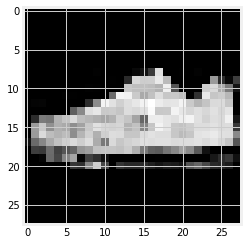

In [3]:
images, labels = next(iter(trainloader))

plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r')

## Building the network

Since we have 10 classes: \['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker',
'Bag','Ankle Boot'\], the output is 10. The size of images is 28 * 28. I will add 2 hidden layers 128, 64

In [4]:
from collections import OrderedDict

input_size = 28*28
hidden_size = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(hidden_size[0], hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('logits', nn.Linear(hidden_size[1], output_size))
]))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)


# Train the network

In [5]:
from torch import optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
epochs = 15
print_every = 40
steps = 0

for epoch in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps +=1
        
        # flatten the fachion-MNIST images into vect 1-D 784
        images.resize_(images.shape[0], 28*28)
        
        # empty gradient
        optimizer.zero_grad()
        
        # forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f"Epoch: {epoch+1}/{epochs}...",
                 f"Loss: {running_loss/print_every: .4f}")
            
            running_loss = 0

Epoch: 1/15... Loss:  2.2515
Epoch: 1/15... Loss:  2.1244
Epoch: 1/15... Loss:  1.9298
Epoch: 1/15... Loss:  1.6773
Epoch: 1/15... Loss:  1.4345
Epoch: 1/15... Loss:  1.2456
Epoch: 1/15... Loss:  1.1070
Epoch: 1/15... Loss:  0.9904
Epoch: 1/15... Loss:  0.9132
Epoch: 1/15... Loss:  0.8810
Epoch: 1/15... Loss:  0.8438
Epoch: 2/15... Loss:  0.2106
Epoch: 2/15... Loss:  0.7478
Epoch: 2/15... Loss:  0.7261
Epoch: 2/15... Loss:  0.6985
Epoch: 2/15... Loss:  0.6912
Epoch: 2/15... Loss:  0.6901
Epoch: 2/15... Loss:  0.6825
Epoch: 2/15... Loss:  0.6746
Epoch: 2/15... Loss:  0.6436
Epoch: 2/15... Loss:  0.6347
Epoch: 2/15... Loss:  0.6311
Epoch: 2/15... Loss:  0.6178
Epoch: 3/15... Loss:  0.3536
Epoch: 3/15... Loss:  0.6102
Epoch: 3/15... Loss:  0.5989
Epoch: 3/15... Loss:  0.6107
Epoch: 3/15... Loss:  0.5821
Epoch: 3/15... Loss:  0.5743
Epoch: 3/15... Loss:  0.5577
Epoch: 3/15... Loss:  0.5777
Epoch: 3/15... Loss:  0.5705
Epoch: 3/15... Loss:  0.5434
Epoch: 3/15... Loss:  0.5486
Epoch: 3/15...

# Show predictions

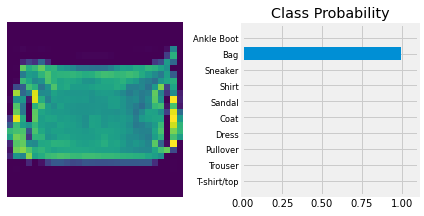

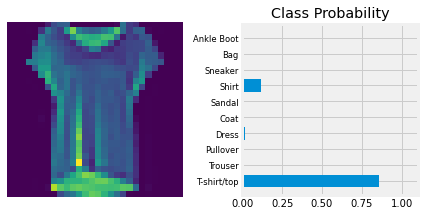

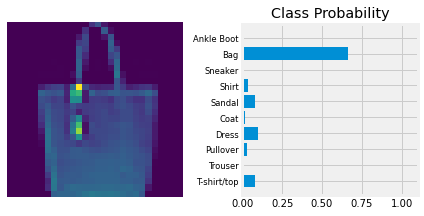

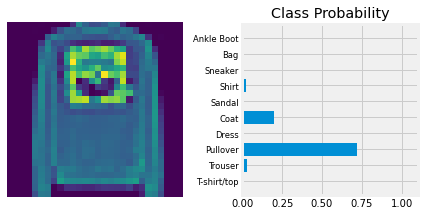

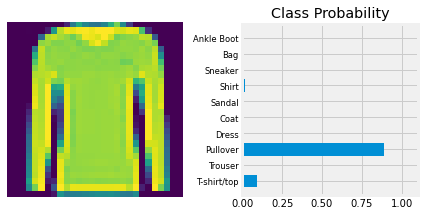

In [7]:
images, labels = next(iter(trainloader))

for i in range(5):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logits = model.forward(img)

    # Output of the network are logits, need to take softmax for probabilities
    ps = F.softmax(logits, dim=1)
    helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')